# Anscombe's quartet 
> "numerical calculations are exact, but graphs are rough."

* [Anscombe’s quartet — seaborn documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)
* [앤스컴 콰르텟 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%95%A4%EC%8A%A4%EC%BB%B4_%EC%BD%B0%EB%A5%B4%ED%85%9F)
* [Anscombe's quartet - Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
* [The Datasaurus Dozen - Same Stats, Different Graphs | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)

In [1]:
import seaborn as sns
# 주피터 노트북 안에서 그래프를 표시합니다.
%matplotlib inline
# 그래프의 스타일을 지정합니다.
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
# 내장되어 있는 데이터셋을 가져옵니다. 이 데이터셋에 대한 설명은 위에 있는 위키백과의 링크를 참고해 주세요.
df = sns.load_dataset("anscombe")

In [2]:
df.shape

(44, 3)

In [5]:
# 데이터의 요약을 보면 평균, 표준편차가 같습니다.
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [6]:
# 데이터의 요약을 보면 평균, 표준편차가 같습니다.
df[df["dataset"] == "I"].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [10]:
# 데이터의 요약을 보면 평균, 표준편차가 같습니다.
df[df["dataset"] == "II"].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [11]:
df[df["dataset"] == "III"].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [12]:
df[df["dataset"] == "IV"].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


In [13]:
df.groupby(["dataset"]).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

## 피어슨 상관 계수
* 피어슨 상관 계수는 두 변수의 공분산을 표준 편차의 곱으로 나눈 값이다. [출처 : 위키백과]( https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)

In [14]:
# 소수점 3자리까지는 상관계수가 같습니다.
df[df["dataset"] == "I"].corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [15]:
df[df["dataset"] == "II"].corr()

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


In [16]:
df[df["dataset"] == "III"].corr()

,x,y
x,1.000000,0.816287
y,0.816287,1.000000


In [17]:
df[df["dataset"] == "IV"].corr()

,x,y
x,1.000000,0.816521
y,0.816521,1.000000


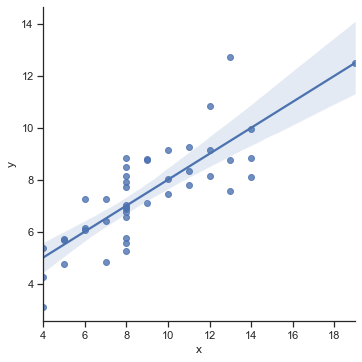

In [18]:
# 메소드의 괄호()안에서 Shift + tab키를 누르시면 문서를 보실 수 있습니다.
sns.lmplot(x="x", y="y", data=df)

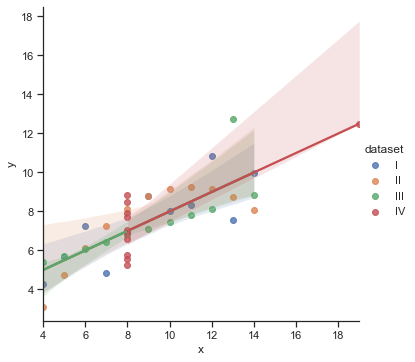

In [19]:
# hue는 데이터의 종류에 따라 다른 색으로 그래프를 표현합니다.
# 여기에서는 회귀선이 다 같아서 선이 하나로 표현되었지만 겹쳐보이는 것입니다.
sns.lmplot(x="x", y="y", data=df, hue="dataset")

<AxesSubplot:xlabel='x', ylabel='y'>

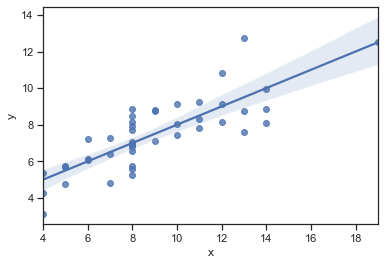

In [20]:
# regplot은 lmplot과 기능이 거의 같지만 hue옵션을 사용할 수 없습니다.
sns.regplot(x="x", y="y", data=df)

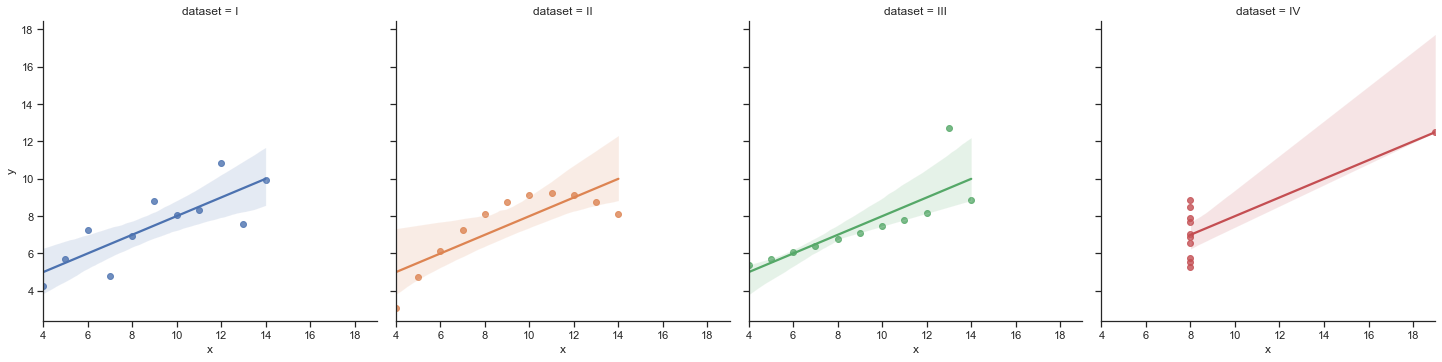

In [21]:
# lmplot그리기
sns.lmplot(x="x", y="y", data=df, hue="dataset", col="dataset")

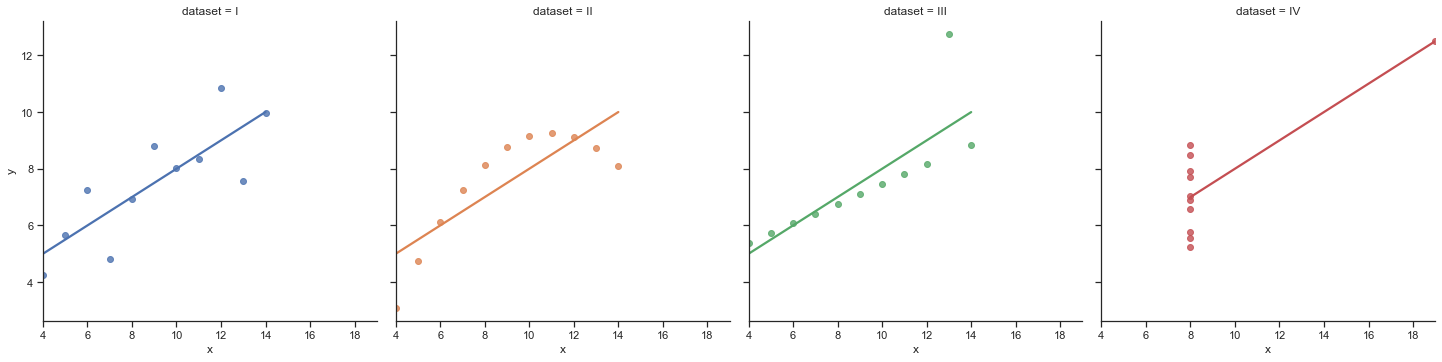

In [22]:
# ci == Size of the confidence interval for the regression estimate
# ci는 신뢰구간을 의미하며 0부터 100까지의 값을 가집니다.
# 만약 95라면 데이터를 샘플링했을 때 그 숫자가 해당 범위에 있을 확률이 95% 라는 의미입니다.
# 여기에서는 위에서 그린 신뢰구간을 제외하고 그려봅니다.
sns.lmplot(x="x", y="y", data=df, hue="dataset", col="dataset", ci=None)

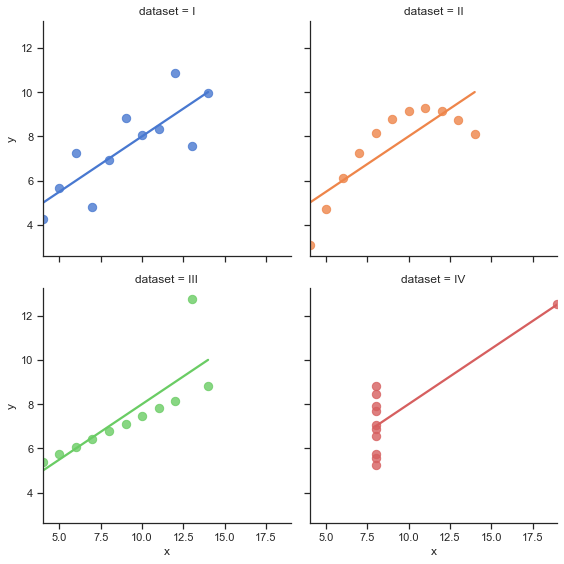

In [18]:
# height는 그래프의 높이를 의미합니다
# scatter_kws에서 s는 점의 크기를, alpha는 투명도를 의미합니다.
sns.lmplot(x="x", y="y", data=df, hue="dataset", col="dataset", 
           col_wrap=2, ci=None, palette="muted", height=4, scatter_kws={"s": 70, "alpha": 0.8})

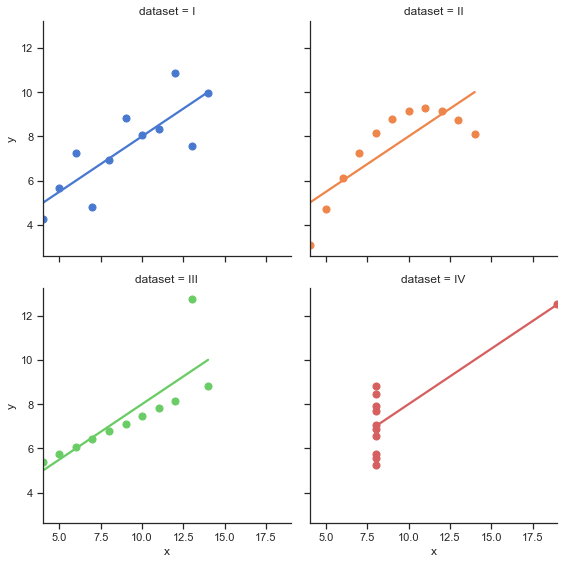

In [19]:
# Show the results of a linear regression within each dataset
# seaborn 사이트에 있는 예제의 그래프를 이해하기 위해 위에서는 옵션을 하나씩 그려봤습니다. 
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})